In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from pytexshade import ipyshade
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Align import MultipleSeqAlignment

## Simple example with description

In [10]:
#Prepare a Multiple Sequence Alignment in biopython
human_h2a_z_core=Seq('SRSQRAGLQFPVGRIHRHLKSRTTSHGRVGATAAVYSAAILEYLTAEVLELAGNASKDLKVKRITPRHLQLAIRGDEELDSLI-KATIAGGGVIPHIHKSLIG')
xenopus_h2a_core=Seq('TRSSRAGLQFPVGRVHRLLRKGNYAE-RVGAGAPVYLAAVLEYLTAEILELAGNAARDNKKTRIIPRHLQLAVRNDEELNKLLGRVTIAQGGVLPNIQSVLLP')
msa=MultipleSeqAlignment([SeqRecord(xenopus_h2a_core,id='H2A',name='H2A'),SeqRecord(human_h2a_z_core,id='H2AZ',name='H2AZ')])


In [11]:
#We need to describe feautures
#See also TexShade docs http://mirrors.mi.ras.ru/CTAN/macros/latex/contrib/texshade/texshade.pdf
features=[
    {'style':'fill:$\\uparrow$', #Styles - all TexShade feature types 'helix','loop','-->','---','<--',',-,' AND also "frameblock", "shaderegion" or "shadeblock", see TexShade docs for more info\
     #'position':'top',# Position of feature annotation also 'bottom','ttop','bbottom', etc. if no - automatic'\
     #'seqref':1, #number of sequence for selections - default consensus\
     'sel':[5,10], # selection with 0-based numbering, both start and end are included!\
     #'color':'Red',# color for for frame block\
     #'thickness':1.5 #-1.5pt also for frameblock\
     #'rescol':'Black',  #this is residue color for shaderegion style, see TexShade docs \shaderegion{ seqref  }{ selection }{ res.col. }{ shad.col. }\
     #'shadcol':'Green',#this is shding color for shaderegion style, see TexShade docs \shaderegion{ seqref  }{ selection }{ res.col. }{ shad.col. }\
     #funcgroup example fg="\\funcgroup{xxx}{CT}{White}{Green}{upper}{up} \\funcgroup{xxx}{GA}{White}{Blue}{upper}{up}"\
     'text':'test'},
     {'style':'helix', \
     'sel':[25,30], # selection with 0-based numbering, both start and end are included!\
     'text':'$\\alpha 1$'},
     {'style':'-->', \
     'sel':[35,40], # selection with 0-based numbering, both start and end are included!\
     'text':'$\\beta 2$'},
]



tempfile created:  /tmp/tmpo00e5h5k.png
Created temporaty directory:  /tmp/tmpf3kqkozz
Created temporaty directory:  /tmp/tmpy0xy6ds_
Chosen splitting parameters
2 20
DEBUG: copying fasta file in current folder for analysis
mkdir -p debug && cp /tmp/tmpy0xy6ds_/alignment0.fasta debug/alignment0.fasta
{'consensus': '\\feature{top}{consensus}{6..11}{fill:$\\uparrow$}{test}\\feature{top}{consensus}{26..31}{helix}{$\\alpha 1$}\\feature{top}{consensus}{36..41}{-->}{$\\beta 2$}'}
DEBUG: copying tex file in current folder for analysis
mkdir -p debug && cp /tmp/tmpy0xy6ds_/align.tex debug/align.tex
Launcning Tectonic:
tectonic /tmp/tmpy0xy6ds_/align.tex 2>&1
note: this is a BETA release; ask questions and report bugs at https://tectonic.newton.cx/
Running TeX ...
Rerunning TeX because "align.aux" changed ...
Running xdvipdfmx ...
Writing /tmp/tmpy0xy6ds_/align.pdf (12750 bytes)
Skipped writing 2 intermediate files (use --keep-intermediates to keep them)

mv /tmp/tmpy0xy6ds_/align.pdf /tmp/tmpf

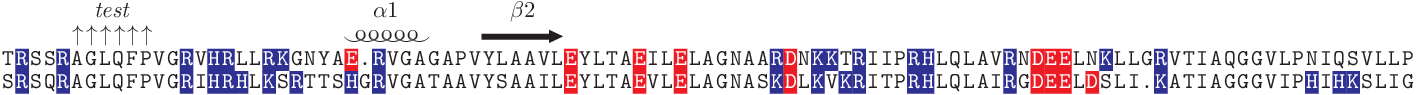

In [13]:
#Shade
ipyshade.shadedmsa(msa,\
     shading_modes=['charge_functional'],# list of shading modes according to TexShade, supported are "similar", "hydropathy_functional", "chemical_functional", "structure_functional", "charge_functional", "diverse"\
     legend=False,features=features,title='',\
     logo=False, #SeqLogo \
     hideseqs=False,#activate \hidseqs command \ 
     splitN=20, #alignment will be split into splitN batches\
     setends=[], # a section of alignment will be displayed between setends[0] and setends[1]\
     ruler=False, # Add a ruler\
     show_seq_names=False,# Show sequence names\
     funcgroups=None, # Hilight functional groups, Tex code should be inserted example funcgroups="\\funcgroup{xxx}{CT}{White}{Green}{upper}{up} \\funcgroup{yyy}{GA}{White}{Blue}{upper}{up}" \
     show_seq_length=False, #Show sequence length \
     debug=True
    )

## Long sequences splitting

In [4]:
#Let's get SEQREC sequences
#Another way if from fasta files provided by PDB
# We get SEQRECORDS  NOTE - these are provided by authors
# and usually contain parts unresolved in 3D
from Bio import SeqIO
import urllib.request
!curl 'https://www.rcsb.org/pdb/download/downloadFastaFiles.do?structureIdList=5Z3L&compressionType=uncompressed'> temp.fasta
records = SeqIO.parse('temp.fasta', "fasta")
chseq_seqrec={}
for r in records:
    chseq_seqrec.update({r.id.split('|')[0].split(':')[1]:r.seq})
#Prepare a Multiple Sequence Alignment in biopython
msa=MultipleSeqAlignment([SeqRecord(chseq_seqrec['O'],id='Snf2',name='Snf2')])


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2396    0  2396    0     0   4102      0 --:--:-- --:--:-- --:--:--  4102


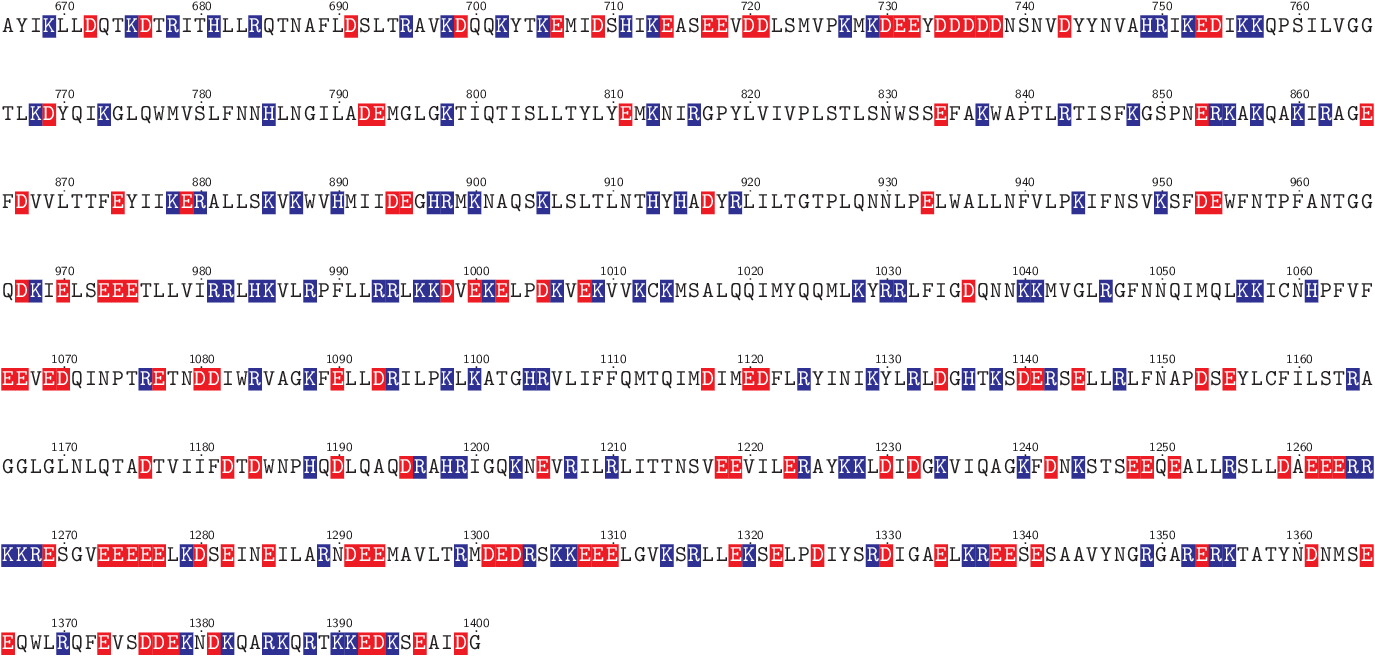

In [6]:
#Shade
ipyshade.shadedmsa(msa,\
     shading_modes=['charge_functional'],# list of shading modes according to TexShade, supported are "similar", "hydropathy_functional", "chemical_functional", "structure_functional", "charge_functional", "diverse"\
     legend=False,features=[],title='',\
     logo=False, #SeqLogo \
     hideseqs=False,#activate \hidseqs command \ 
     splitN=20, #alignment will be split into splitN batches\
     setends=[1,10000], # a section of alignment will be displayed between setends[0] and setends[1]\
     ruler=True, # Add a ruler\
     show_seq_names=False,# Show sequence names\
     funcgroups=None, # Hilight functional groups, Tex code should be inserted example funcgroups="\\funcgroup{xxx}{CT}{White}{Green}{upper}{up} \\funcgroup{yyy}{GA}{White}{Blue}{upper}{up}" \
     show_seq_length=False, #Show sequence length \
     resperline=100, startnumber=666, debug = False
    )

## More examples
in development

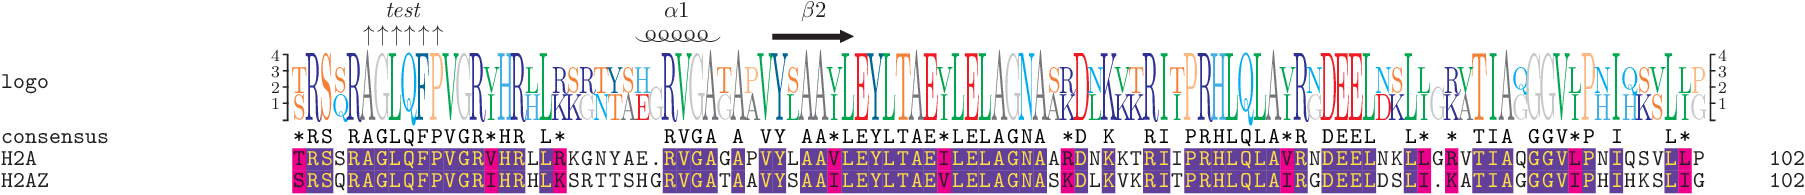

In [75]:
#Shade
ipyshade.shadedmsa(msa,debug=False,\
     shading_modes=['similar'],# list of shading modes according to TexShade, supported are "similar", "hydropathy_functional", "chemical_functional", "structure_functional", "charge_functional", "diverse"\
     legend=False,features=features,title='',\
     logo=True, #SeqLogo \
     hideseqs=False,#activate \hidseqs command \ 
     splitN=20, #alignment will be split into splitN batches\
     setends=[], # a section of alignment will be displayed between setends[0] and setends[1]\
     ruler=False, # Add a ruler\
     show_seq_names=True,# Show sequence names\
     funcgroups=None, # Hilight functional groups, Tex code should be inserted example funcgroups="\\funcgroup{xxx}{CT}{White}{Green}{upper}{up} \\funcgroup{yyy}{GA}{White}{Blue}{upper}{up}" \
     show_seq_length=True #Show sequence length \
    )

## Getting feature annotation from NCBI/PDB


In [18]:
from Bio import Entrez
Entrez.email = "alex@intbio.org"  # Always tell NCBI who you are
handle = Entrez.efetch(db="protein", id="5Z3L_O", rettype="gb", retmode="text")
record = SeqIO.read(handle, "genbank")
msa=MultipleSeqAlignment([record])

In [19]:
msa[0].id='Snf2' # Tex does not really like ids starting from a number.

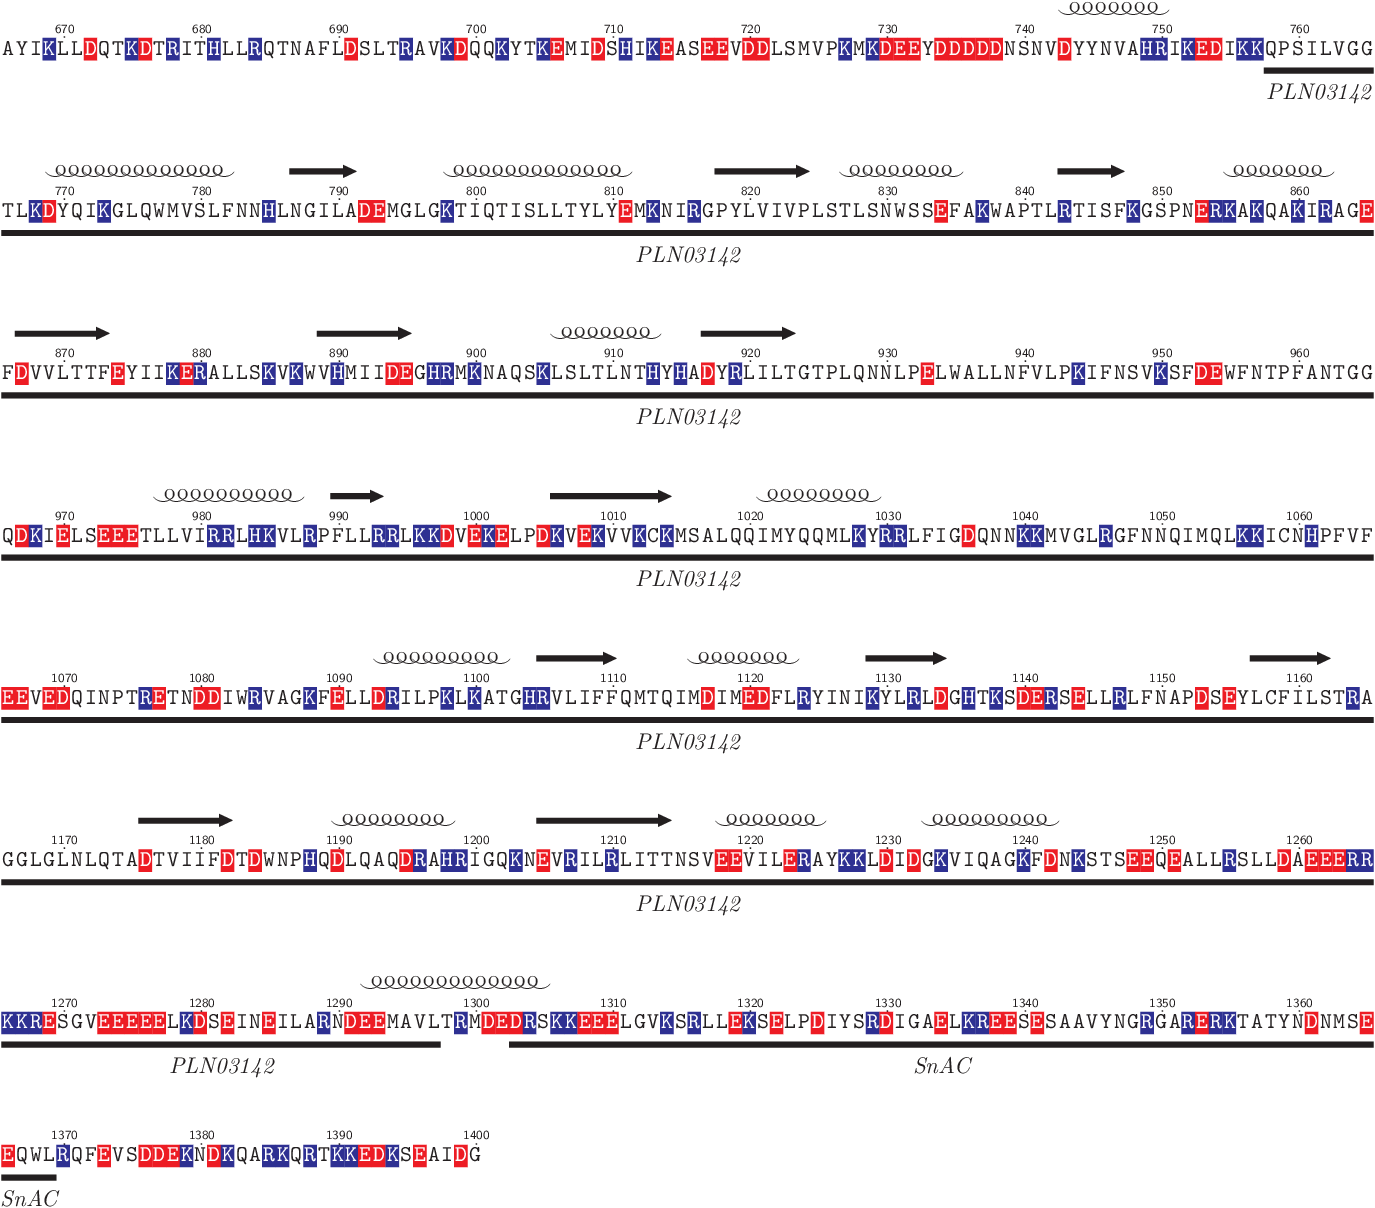

In [21]:
from pytexshade.shade import seqfeat2shadefeat
ipyshade.shadedmsa(msa,\
     shading_modes=['charge_functional'],# list of shading modes according to TexShade, supported are "similar", "hydropathy_functional", "chemical_functional", "structure_functional", "charge_functional", "diverse"\
     legend=False,features=seqfeat2shadefeat(msa),title='',\
     logo=False, #SeqLogo \
     hideseqs=False,#activate \hidseqs command \ 
     splitN=20, #alignment will be split into splitN batches\
     setends=[1,10000], # a section of alignment will be displayed between setends[0] and setends[1]\
     ruler=True, # Add a ruler\
     show_seq_names=False,# Show sequence names\
     funcgroups=None, # Hilight functional groups, Tex code should be inserted example funcgroups="\\funcgroup{xxx}{CT}{White}{Green}{upper}{up} \\funcgroup{yyy}{GA}{White}{Blue}{upper}{up}" \
     show_seq_length=False, #Show sequence length \
     resperline=100, startnumber=666, debug = False
    )

## Big alignments

In [42]:
from Bio import AlignIO
from urllib.request import urlopen 
import tempfile
temp = tempfile.NamedTemporaryFile()
pfam_path="https://pfam.xfam.org/family/PF00125/alignment/seed"
data = urlopen(pfam_path).read()
# print(data)
with open(temp.name,'wb') as f:
    f.write(data)
alignment = AlignIO.read(temp.name, "stockholm")

In [45]:
print(alignment[0:5])

SingleLetterAlphabet() alignment with 5 rows and 142 columns
AHKRKPSTPRRRSPPASLPPPAGSRTRR-HSGPSGSSPRKKHKF...RIR CENPA_DANRE/7-140
MGPRRKPQTPRRRPSSPAPGPSRQ---------SSSVGSQTLRR...RIR CENPA_MOUSE/1-127
MAKKSLMAEPGDPIPRP----------------------RKKRY...RIR CENPA_SCHPO/1-118
HVESEEENKRLPEKYSLDKYVKRSRKQR-DHRHIVAKPKEKRNF...RIR CENPA_CANGA/101-236
MARTKQTARKSTGGKAPRKQLATKAAR--KSAPATGGVKKPHRY...RIR H32_HUMAN/1-132


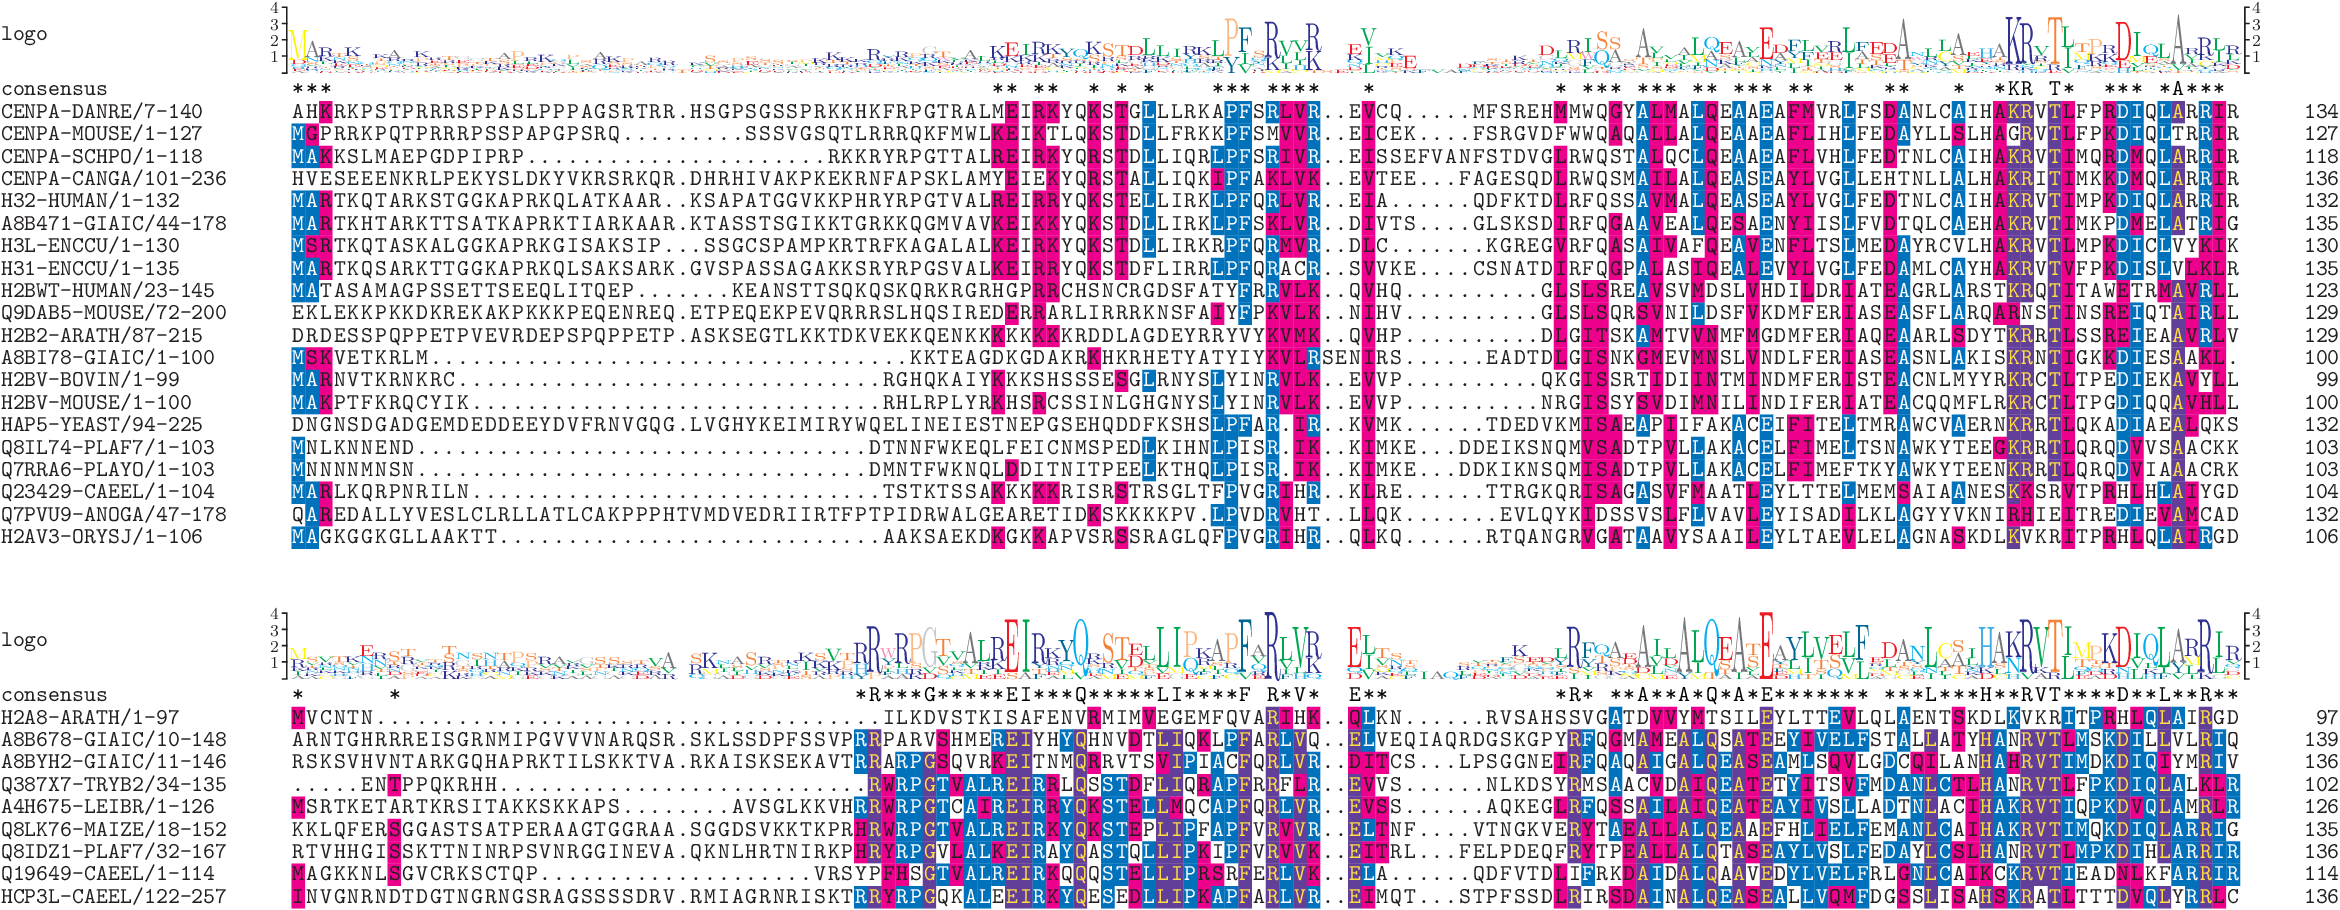

In [82]:
#Shade
ipyshade.shadedmsa(alignment,debug=False,\
     shading_modes=['similar'],# list of shading modes according to TexShade, supported are "similar", "hydropathy_functional", "chemical_functional", "structure_functional", "charge_functional", "diverse"\
     legend=False,features=[],title='',\
     logo=True, #SeqLogo \
     hideseqs=False,#activate \hidseqs command \ 
     splitN=20, #alignment will be split into splitN batches\
     setends=[], # a section of alignment will be displayed between setends[0] and setends[1]\
     ruler=False, # Add a ruler\
     show_seq_names=True,# Show sequence names\
     funcgroups=None, # Hilight functional groups, Tex code should be inserted example funcgroups="\\funcgroup{xxx}{CT}{White}{Green}{upper}{up} \\funcgroup{yyy}{GA}{White}{Blue}{upper}{up}" \
     show_seq_length=True #Show sequence length \
    )

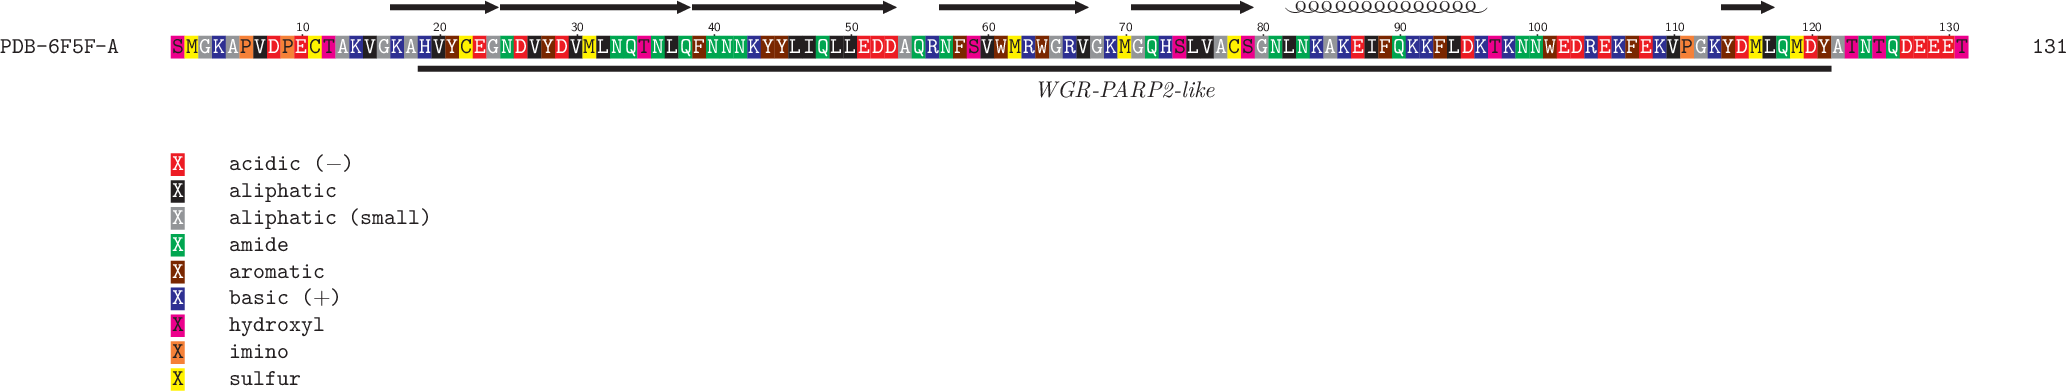

In [11]:




ipyshade.shadepdbquick(pdb_chain_id="6F5F_A",shading_modes=['chemical_functional'])


In [12]:
from Bio import AlignIO
from urllib.request import urlopen 
import tempfile
temp = tempfile.NamedTemporaryFile()
pfam_path="https://pfam.xfam.org/family/PF05406/alignment/seed"
data = urlopen(pfam_path).read()
# print(data)
with open(temp.name,'wb') as f:
    f.write(data)
alignment = AlignIO.read(temp.name, "stockholm")

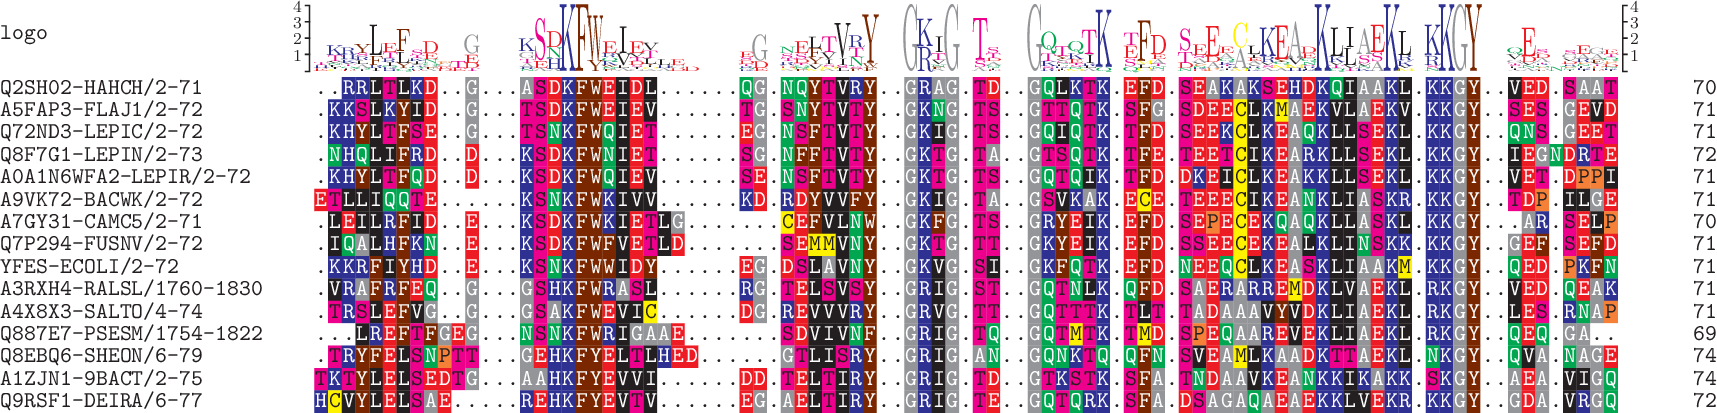

In [16]:
#Shade
ipyshade.shadedmsa(alignment[0:15],debug=False,\
     shading_modes=['chemical_functional'],# list of shading modes according to TexShade, supported are "similar", "hydropathy_functional", "chemical_functional", "structure_functional", "charge_functional", "diverse"\
     legend=False,features=[],title='',\
     logo=True, #SeqLogo \
     hideseqs=False,#activate \hidseqs command \ 
     splitN=20, #alignment will be split into splitN batches\
     setends=[], # a section of alignment will be displayed between setends[0] and setends[1]\
     ruler=False, # Add a ruler\
     show_seq_names=True,# Show sequence names\
     funcgroups=None, # Hilight functional groups, Tex code should be inserted example funcgroups="\\funcgroup{xxx}{CT}{White}{Green}{upper}{up} \\funcgroup{yyy}{GA}{White}{Blue}{upper}{up}" \
     show_seq_length=True #Show sequence length \
    )